In [1]:
import random
random.seed(1)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

dados2000_2018 = pd.read_csv ('BASE_CONSOLIDADA_PBL.csv', sep=';', na_values='ND')
dados2000_2018.head()


,CODIGO,EMPRESA,ANO,ANO&COD,1.DEC_Apurada,1.1.DEC_Limite,1.2.DEC_V8,2.FEC_Apurada,2.1.FEC_Limite,2.2.FEC_V8,...,47.2.Subestacoes_88_138,47.3.Subestacoes_230,48.MVA_Total,49.MVA_MT,50.MVA_AT,50.1.MVA_69,50.2.MVA_88_138,50.3.MVA_230,61.Compensacoes_Q,62.Compensacoes_Reais
0,D01,AES SUL,2000,2000D01,24.45,25.440,NaN,18.59,26.56,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D01f,RGE SUL,2000,2000D01f,NaN,34.395,NaN,13.77,31.60,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D02-0,CEAM,2000,2000D02-0,218.93,50.000,NaN,186.26,60.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D02,AMAZONAS,2000,2000D02,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D03,Enel RJ,2000,2000D03,16.67,35.100,NaN,21.47,48.11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


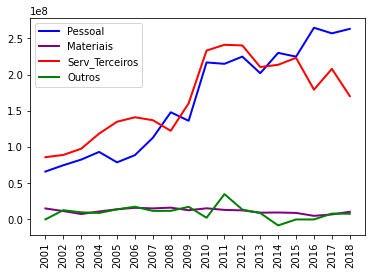

In [2]:
Distrib_X = dados2000_2018.loc[dados2000_2018['EMPRESA'] == 'AMAZONAS']
CO = Distrib_X[['ANO', '18.1.Custos_Operacionais', '18.2.Pessoal', '18.3.Materiais', '18.4.Serv_Terceiros', '18.7.Outros']]
CO = CO.dropna()
plt.plot( 'ANO', '18.2.Pessoal', data=CO, color='blue', linewidth=2, label="Pessoal")
plt.plot( 'ANO', '18.3.Materiais', data=CO, color='purple', linewidth=2, label="Materiais")
plt.plot( 'ANO', '18.4.Serv_Terceiros', data=CO, color='red', linewidth=2, label="Serv_Terceiros")
plt.plot( 'ANO', '18.7.Outros', data=CO, color='green', linewidth=2, label="Outros")
plt.xticks(CO['ANO'], rotation='vertical')
plt.legend()
plt.show()

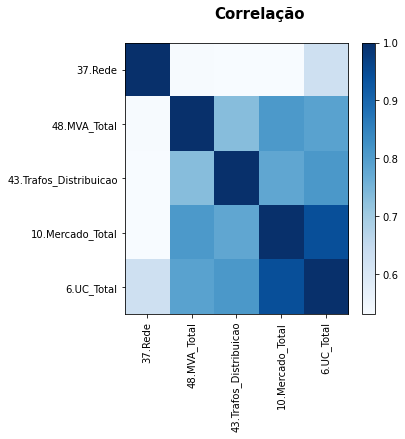

                         37.Rede  48.MVA_Total  43.Trafos_Distribuicao  \
37.Rede                 1.000000      0.533282                0.531618   
48.MVA_Total            0.533282      1.000000                0.732280   
43.Trafos_Distribuicao  0.531618      0.732280                1.000000   
10.Mercado_Total        0.530058      0.808565                0.780188   
6.UC_Total              0.627878      0.790586                0.809727   

                        10.Mercado_Total  6.UC_Total  
37.Rede                         0.530058    0.627878  
48.MVA_Total                    0.808565    0.790586  
43.Trafos_Distribuicao          0.780188    0.809727  
10.Mercado_Total                1.000000    0.944121  
6.UC_Total                      0.944121    1.000000  


In [3]:
##obtém a matriz de correlação dos dados
df_produtos = dados2000_2018[["37.Rede","48.MVA_Total","43.Trafos_Distribuicao","10.Mercado_Total","6.UC_Total"]]
corr = df_produtos.corr()
##Mostra a matriz
plt.figure(figsize=(5, 5))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar() 
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlação', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()
print(corr)